In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import string
import math
import gensim.downloader as api

In [136]:
print("np version : {}".format(np.__version__))
print("pd version : {}".format(pd.__version__))
print("may chaos take the world.")

np version : 1.24.1
pd version : 1.5.3
may chaos take the world.


<h1>Load Data</h1>

In [137]:
df = pd.read_excel("Dataset.xlsx")
questionList = df["Question"]
answerList = df["Answer"]

print(questionList)
print(answerList)

0                             How did we come to exist?
1                             How did we come to exist?
2                       Do you think you need to exist?
3                       Do you think you need to exist?
4                       Do you think you need to exist?
                            ...                        
67    We see from our side that maybe they are miser...
68    We see from our side that maybe they are miser...
69    We see from our side that maybe they are miser...
70    We see from our side that maybe they are miser...
71    We see from our side that maybe they are miser...
Name: Question, Length: 72, dtype: object
0     Everybody should believe that they are creatio...
1     We came from evolution. This is undeniable, an...
2     We don't really need to exist. Even if I don't...
3     I don't think we need to exist. As Peter said,...
4            I think we are a part of a bigger picture.
                            ...                        
67    

<h2>Grouped by the events</h2>

In [138]:
df.head()
eventList = df["Event"].unique()
df_groupby_event = df.groupby("Event")
df_groupby_event.get_group(eventList[0])

,No,Question,Answer,Event,Speaker,Q-Label,A-Label
0,1,How did we come to exist?,Everybody should believe that they are creatio...,2022-02-19,P,Sesuai,Sesuai
1,2,How did we come to exist?,"We came from evolution. This is undeniable, an...",2022-02-19,G,Sesuai,Sesuai
2,3,Do you think you need to exist?,We don't really need to exist. Even if I don't...,2022-02-19,P,Sesuai,Sesuai
3,4,Do you think you need to exist?,"I don't think we need to exist. As Peter said,...",2022-02-19,Je,Sesuai,Sesuai
4,5,Do you think you need to exist?,I think we are a part of a bigger picture.,2022-02-19,Th,Sesuai,Tidak Sesuai
5,6,Do you think you need to exist?,"Yes, because we're a part of a community where...",2022-02-19,Th,Sesuai,Sesuai
6,7,Do you think you need to exist?,"In general, humans have made many impacts. Th...",2022-02-19,DJ,Sesuai,Sesuai
7,8,Do you think you need to exist?,"This got me thinking, if we question the purpo...",2022-02-19,R,Sesuai,Tidak Sesuai
8,9,"From a bigger perspective, why did God create us?",It's a mystery. We won't know. Religion said s...,2022-02-19,G,Sesuai,Sesuai
9,10,"From a bigger perspective, why did God create us?",I think God himself needs an outlet to His lov...,2022-02-19,Th,Sesuai,Sesuai


<h2>Grouped by the questions</h2>

In [139]:
questionList = df["Question"].unique()
df_groupby_questions = df.groupby("Question")
df_groupby_questions.get_group(questionList[2])

,No,Question,Answer,Event,Speaker,Q-Label,A-Label
8,9,"From a bigger perspective, why did God create us?",It's a mystery. We won't know. Religion said s...,2022-02-19,G,Sesuai,Sesuai
9,10,"From a bigger perspective, why did God create us?",I think God himself needs an outlet to His lov...,2022-02-19,Th,Sesuai,Sesuai
10,11,"From a bigger perspective, why did God create us?",God created us to glorify Him.,2022-02-19,Mi,Sesuai,Sesuai
11,12,"From a bigger perspective, why did God create us?",God is full of mysteries. How should I know.,2022-02-19,Pau,Sesuai,Sesuai
12,13,"From a bigger perspective, why did God create us?",I too believe that humans are created for a pu...,2022-02-19,Pau,Sesuai,Sesuai
13,14,"From a bigger perspective, why did God create us?","Maybe because God is a relational being, so He...",2022-02-19,Liz,Sesuai,Sesuai
14,15,"From a bigger perspective, why did God create us?",I reckon God created humans so the world would...,2022-02-19,R,Sesuai,Sesuai


<h2>The whole thing fam</h2>

In [140]:
whole_doc = ""

for answer in answerList:
    whole_doc += " {}".format(answer)

print(whole_doc)
# this is just too big a document.


 Everybody should believe that they are creations, made by a creator. It is a prerequisite to believing anything else that comes after. We came from evolution. This is undeniable, and the Charles Darwin's evolution model is the most widely accepted theory to this. We evolved from unicellular bacteriae, to fish, to amphibious creatures, to mammals, to apes, then all the way to humans. We don't really need to exist. Even if I don't exist, everything would go on as it's supposed to be. My existence is one amongst many. It should not gravely affect the world and life would go on. I don't think we need to exist. As Peter said, everything would just go on as usual, regardless of your existence or not. I think we are a part of a bigger picture. Yes, because we're a part of a community where God put us in. There should be a purpose and meaning to it, shouldn't it? In general,  humans have made many impacts. The term 'butterfly effect' supports this statement; what if most of it is negative imp

<h1>Preprocessing</h1>

In [142]:
# case folding
for i in range(len(df)):
    df["Answer"][i] = df["Answer"][i].lower()

df.head()

whole_doc = whole_doc.lower()
print(whole_doc)


 everybody should believe that they are creations, made by a creator. it is a prerequisite to believing anything else that comes after. we came from evolution. this is undeniable, and the charles darwin's evolution model is the most widely accepted theory to this. we evolved from unicellular bacteriae, to fish, to amphibious creatures, to mammals, to apes, then all the way to humans. we don't really need to exist. even if i don't exist, everything would go on as it's supposed to be. my existence is one amongst many. it should not gravely affect the world and life would go on. i don't think we need to exist. as peter said, everything would just go on as usual, regardless of your existence or not. i think we are a part of a bigger picture. yes, because we're a part of a community where god put us in. there should be a purpose and meaning to it, shouldn't it? in general,  humans have made many impacts. the term 'butterfly effect' supports this statement; what if most of it is negative imp

C:\Users\peter\AppData\Local\Temp\ipykernel_16268\3125574558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Answer"][i] = df["Answer"][i].lower()


In [143]:
# DONT remove punct YET
for i in range(len(answerList)):
    answerList[i] = "".join([char for char in answerList[i] if char not in string.punctuation])

whole_doc_no_punc = "".join([char for char in whole_doc if char not in string.punctuation])
print(whole_doc_no_punc)

 everybody should believe that they are creations made by a creator it is a prerequisite to believing anything else that comes after we came from evolution this is undeniable and the charles darwins evolution model is the most widely accepted theory to this we evolved from unicellular bacteriae to fish to amphibious creatures to mammals to apes then all the way to humans we dont really need to exist even if i dont exist everything would go on as its supposed to be my existence is one amongst many it should not gravely affect the world and life would go on i dont think we need to exist as peter said everything would just go on as usual regardless of your existence or not i think we are a part of a bigger picture yes because were a part of a community where god put us in there should be a purpose and meaning to it shouldnt it in general  humans have made many impacts the term butterfly effect supports this statement what if most of it is negative impact this got me thinking if we questio

C:\Users\peter\AppData\Local\Temp\ipykernel_16268\1747765515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = "".join([char for char in answerList[i] if char not in string.punctuation])


In [147]:
# tokenizing
from nltk import word_tokenize
for i in range(len(answerList)):
    answerList[i] = word_tokenize(answerList[i])

whole_doc_tokens = word_tokenize(whole_doc_no_punc)
print(whole_doc_tokens)

['everybody', 'should', 'believe', 'that', 'they', 'are', 'creations', 'made', 'by', 'a', 'creator', 'it', 'is', 'a', 'prerequisite', 'to', 'believing', 'anything', 'else', 'that', 'comes', 'after', 'we', 'came', 'from', 'evolution', 'this', 'is', 'undeniable', 'and', 'the', 'charles', 'darwins', 'evolution', 'model', 'is', 'the', 'most', 'widely', 'accepted', 'theory', 'to', 'this', 'we', 'evolved', 'from', 'unicellular', 'bacteriae', 'to', 'fish', 'to', 'amphibious', 'creatures', 'to', 'mammals', 'to', 'apes', 'then', 'all', 'the', 'way', 'to', 'humans', 'we', 'dont', 'really', 'need', 'to', 'exist', 'even', 'if', 'i', 'dont', 'exist', 'everything', 'would', 'go', 'on', 'as', 'its', 'supposed', 'to', 'be', 'my', 'existence', 'is', 'one', 'amongst', 'many', 'it', 'should', 'not', 'gravely', 'affect', 'the', 'world', 'and', 'life', 'would', 'go', 'on', 'i', 'dont', 'think', 'we', 'need', 'to', 'exist', 'as', 'peter', 'said', 'everything', 'would', 'just', 'go', 'on', 'as', 'usual', 're

C:\Users\peter\AppData\Local\Temp\ipykernel_16268\3108143107.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = word_tokenize(answerList[i])


In [148]:
# stop word removal
from nltk.corpus import stopwords
# print(stopwords.words("english"))

# set stopwords here
stop_words = set(stopwords.words("english"))
for i in range(len(answerList)):
    answerList[i] = [w for w in answerList[i] if not w in stop_words]
    # print(answerList[i])

whole_doc_tokens = [w for w in whole_doc_tokens if not w in stop_words]
print(whole_doc_tokens)
    

['everybody', 'believe', 'creations', 'made', 'creator', 'prerequisite', 'believing', 'anything', 'else', 'comes', 'came', 'evolution', 'undeniable', 'charles', 'darwins', 'evolution', 'model', 'widely', 'accepted', 'theory', 'evolved', 'unicellular', 'bacteriae', 'fish', 'amphibious', 'creatures', 'mammals', 'apes', 'way', 'humans', 'dont', 'really', 'need', 'exist', 'even', 'dont', 'exist', 'everything', 'would', 'go', 'supposed', 'existence', 'one', 'amongst', 'many', 'gravely', 'affect', 'world', 'life', 'would', 'go', 'dont', 'think', 'need', 'exist', 'peter', 'said', 'everything', 'would', 'go', 'usual', 'regardless', 'existence', 'think', 'part', 'bigger', 'picture', 'yes', 'part', 'community', 'god', 'put', 'us', 'purpose', 'meaning', 'shouldnt', 'general', 'humans', 'made', 'many', 'impacts', 'term', 'butterfly', 'effect', 'supports', 'statement', 'negative', 'impact', 'got', 'thinking', 'question', 'purpose', 'existence', 'ask', 'creator', 'know', 'answer', 'creator', 'answer

C:\Users\peter\AppData\Local\Temp\ipykernel_16268\3795741501.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = [w for w in answerList[i] if not w in stop_words]


<h1>Visualize, Realize, BRUTALIZE</h1>

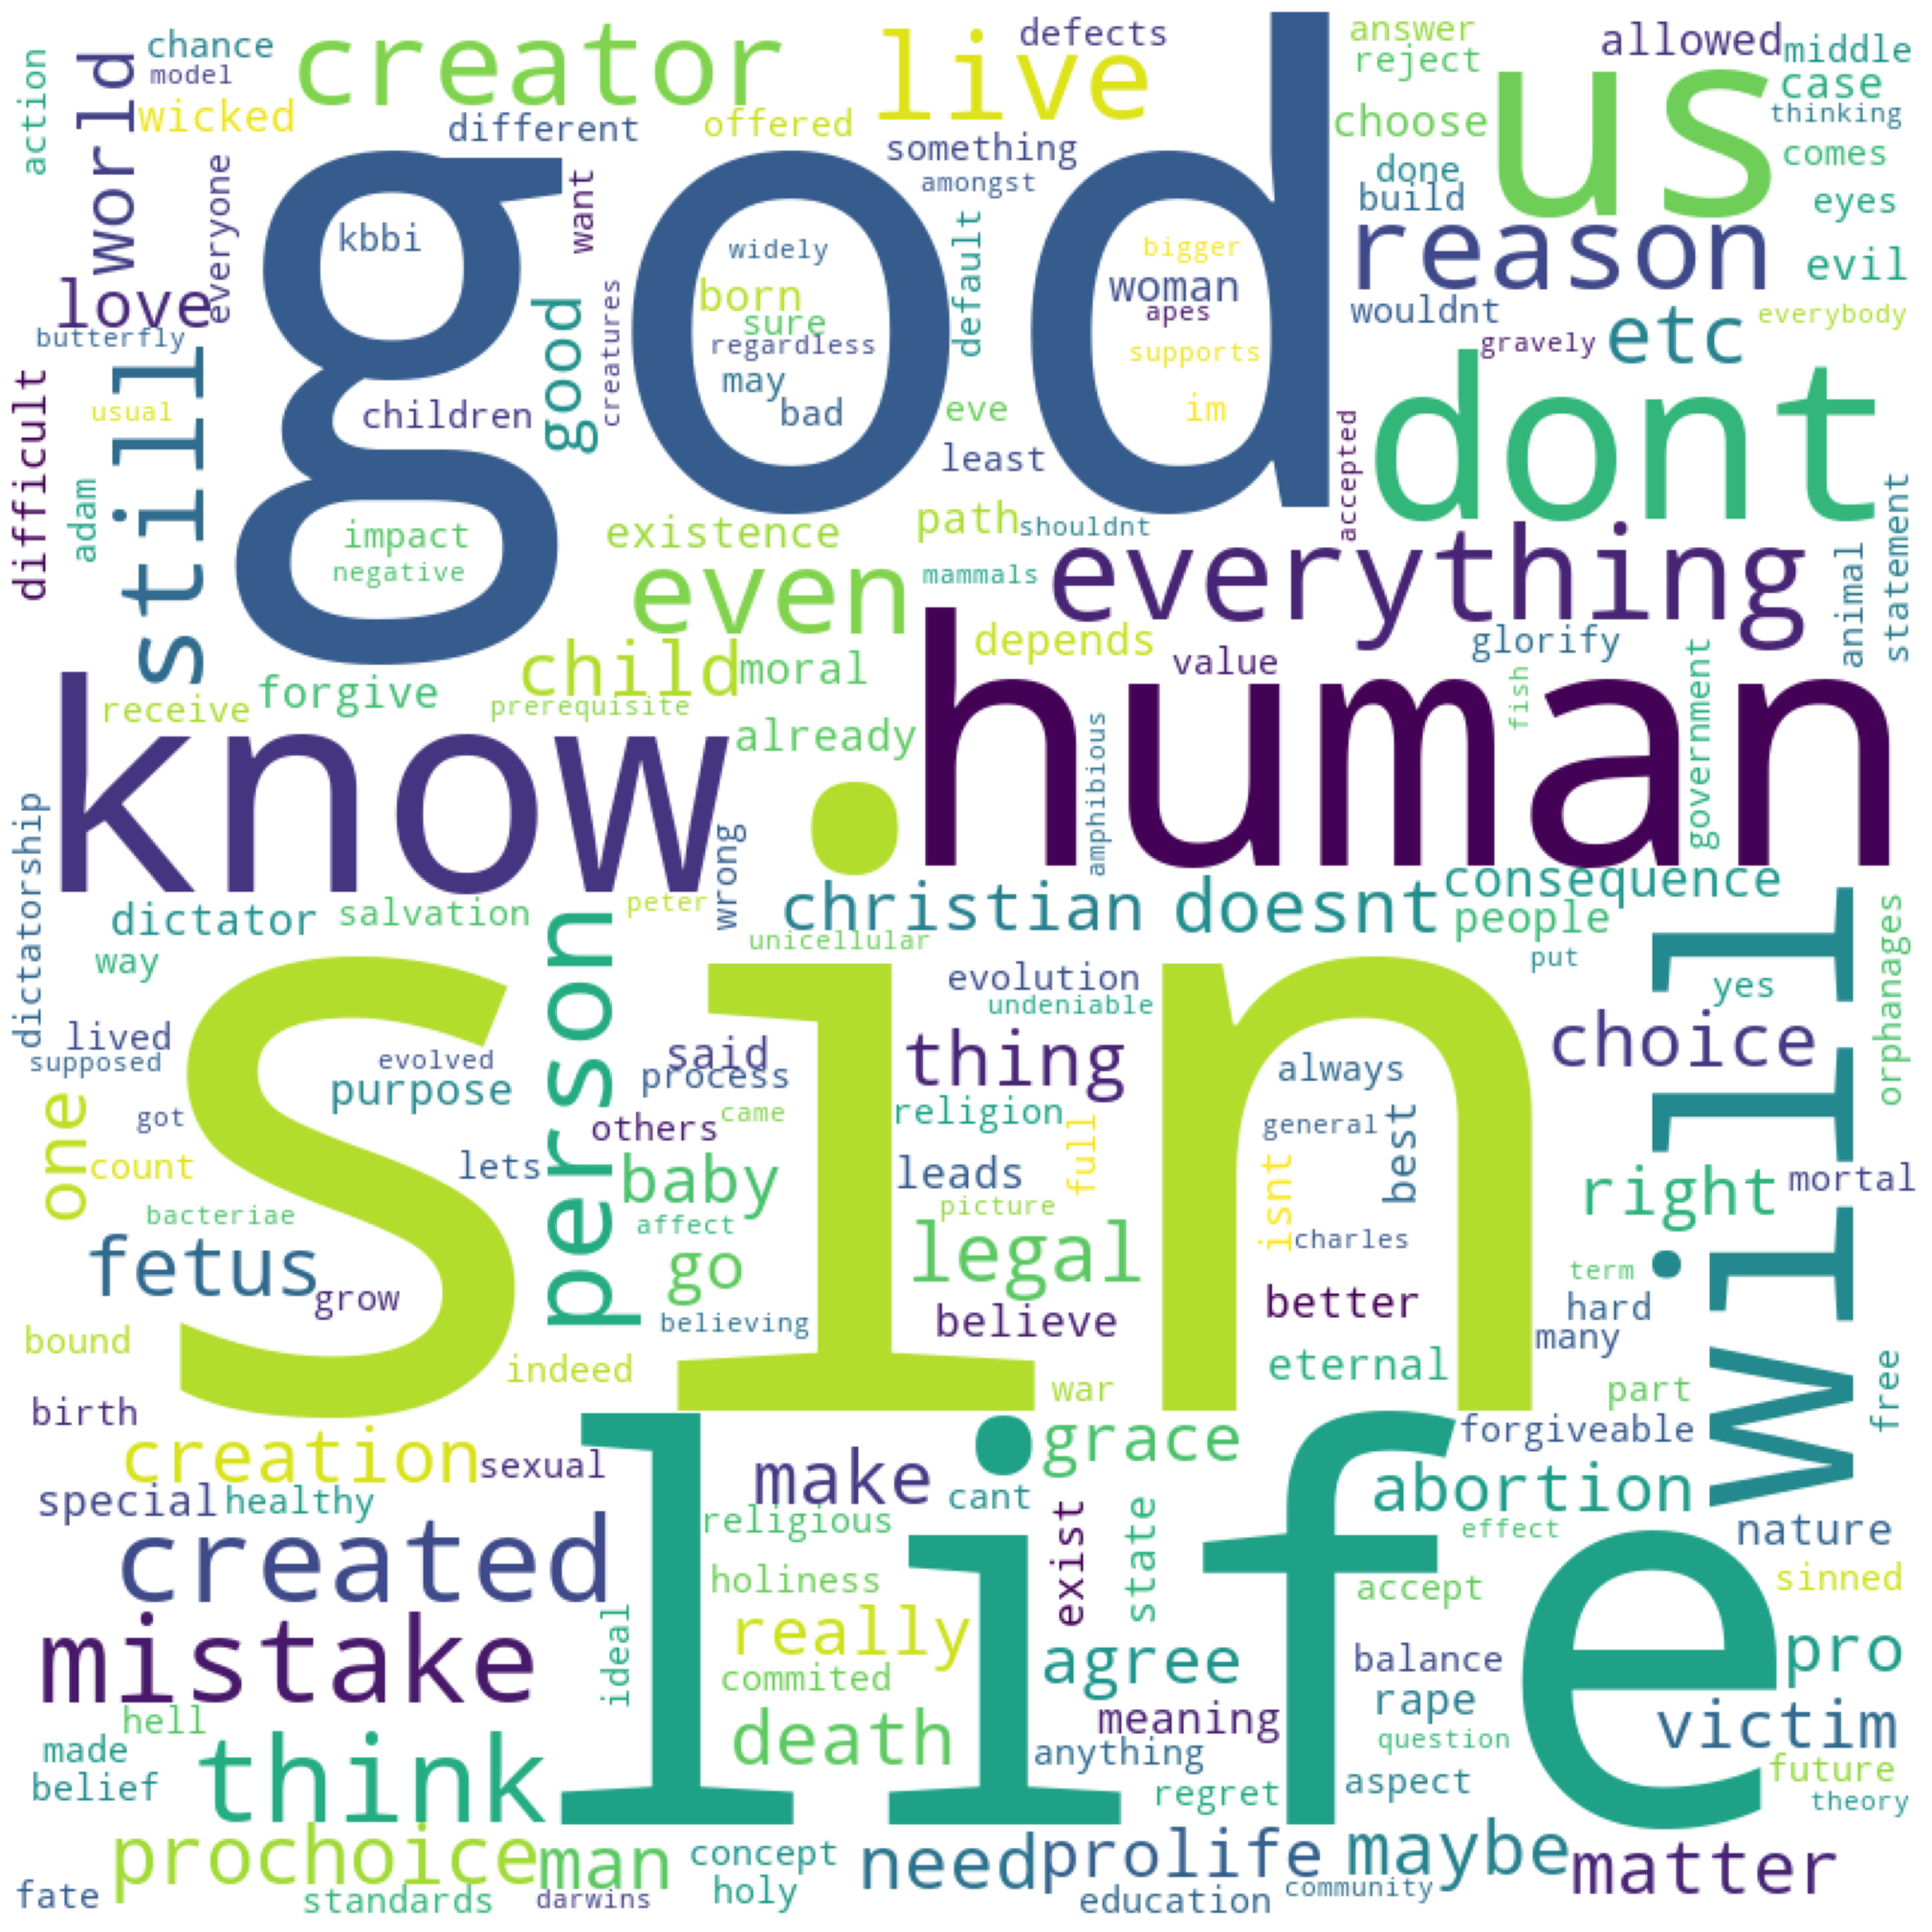

In [149]:
# word clouds
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(whole_doc_no_punc)

plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


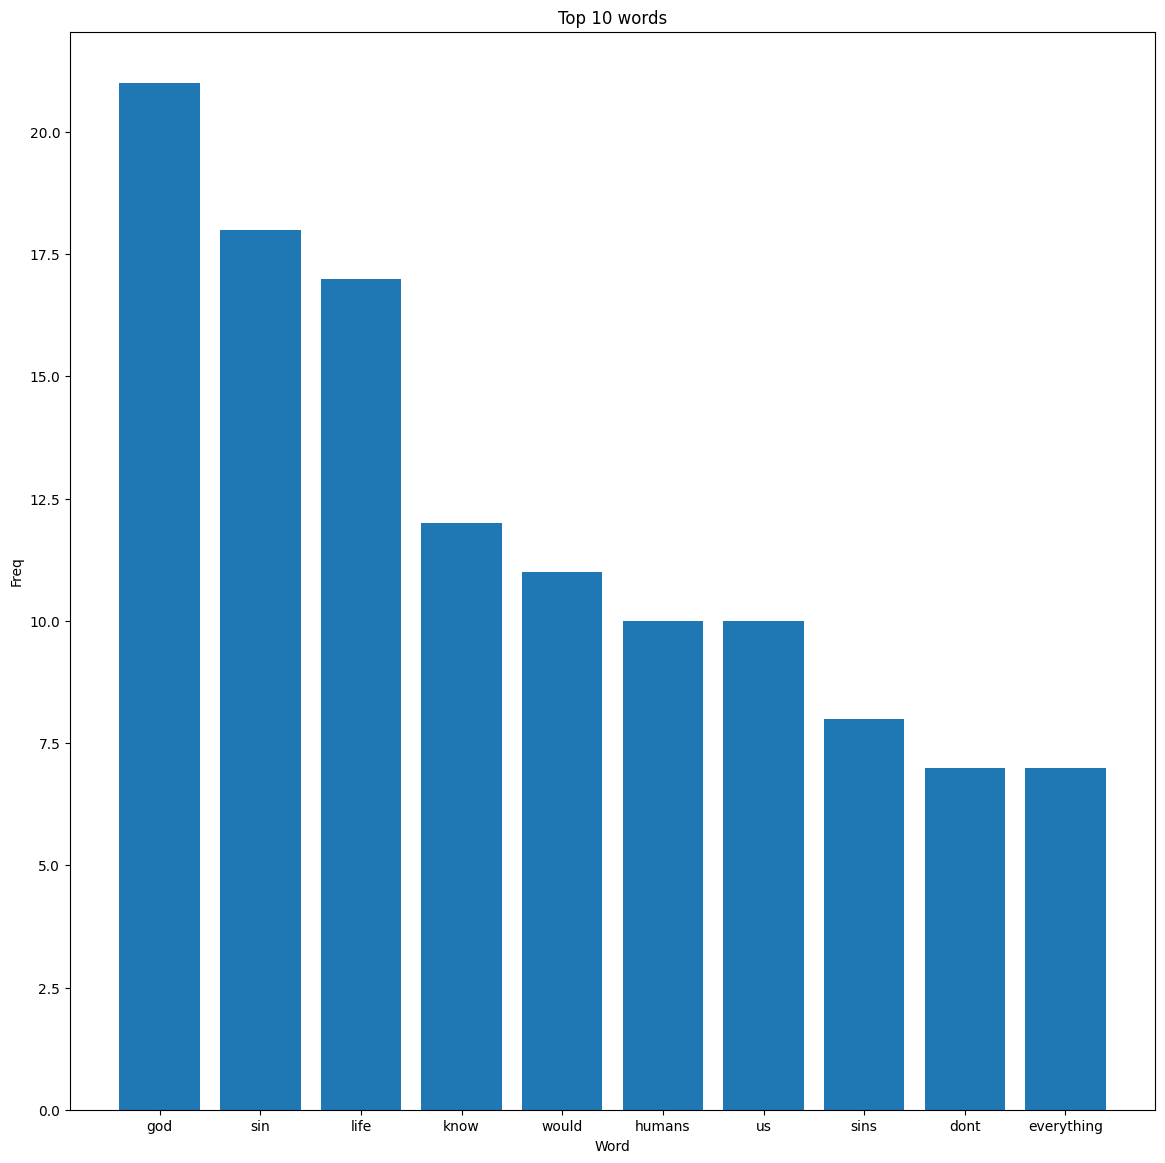

In [159]:
# bar charts
import collections

counter = collections.Counter(whole_doc_tokens)
top_10 = counter.most_common(10)

plt.figure(figsize=(14,14))
labels, values = zip(*top_10)
plt.bar(labels, values)

plt.title('Top 10 words')
plt.xlabel('Word')
plt.ylabel('Freq')

plt.show()

In [ ]:
# histograms

<h1>Embedding</h1>

In [16]:
# W2V
#  Word2Vec
from gensim.models import Word2Vec

# own word embedding model
model = Word2Vec(sentences=answerList, vector_size=20, window=5, min_count=0, workers=4, epochs=100, sg=0)

# text-8
corpus = api.load('text8')
model_pretrained = Word2Vec(corpus)

w2v = model.wv
w2v2 = model_pretrained.wv

In [161]:
# topic modelling as a whole.
import gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

dictionary = gensim.corpora.Dictionary([whole_doc_tokens])
corpus = [dictionary.doc2bow(whole_doc_tokens)]

# LDA Babie!!!
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary)

vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# you can try this again.

c:\Users\peter\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


<h1>For each event<h1>

In [164]:
df_groupby_event.get_group(eventList[0])



,No,Question,Answer,Event,Speaker,Q-Label,A-Label
0,1,How did we come to exist?,"[everybody, believe, creations, made, creator,...",2022-02-19,P,Sesuai,Sesuai
1,2,How did we come to exist?,"[came, evolution, undeniable, charles, darwins...",2022-02-19,G,Sesuai,Sesuai
2,3,Do you think you need to exist?,"[dont, really, need, exist, even, dont, exist,...",2022-02-19,P,Sesuai,Sesuai
3,4,Do you think you need to exist?,"[dont, think, need, exist, peter, said, everyt...",2022-02-19,Je,Sesuai,Sesuai
4,5,Do you think you need to exist?,"[think, part, bigger, picture]",2022-02-19,Th,Sesuai,Tidak Sesuai
5,6,Do you think you need to exist?,"[yes, part, community, god, put, us, purpose, ...",2022-02-19,Th,Sesuai,Sesuai
6,7,Do you think you need to exist?,"[general, humans, made, many, impacts, term, b...",2022-02-19,DJ,Sesuai,Sesuai
7,8,Do you think you need to exist?,"[got, thinking, question, purpose, existence, ...",2022-02-19,R,Sesuai,Tidak Sesuai
8,9,"From a bigger perspective, why did God create us?","[mystery, wont, know, religion, said, religion...",2022-02-19,G,Sesuai,Sesuai
9,10,"From a bigger perspective, why did God create us?","[think, god, needs, outlet, love, given, nature]",2022-02-19,Th,Sesuai,Sesuai
